# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")


from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split

# 2. Read and Understand Data

In [2]:
df = pd.read_csv("../artifacts/data_ingestion/podcast_dataset.csv")

print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Number of rows : 52500
Number of columns : 11


In [3]:
df.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Healthy Living,Episode 77,99.25,Health,21.37,Thursday,Night,70.22,3,Positive,55.158695
1,Mystery Matters,Episode 6,19.43,True Crime,47.19,Friday,Evening,75.15,1,Neutral,7.686559
2,Current Affairs,Episode 1,117.03,News,96.33,Sunday,Night,57.95,3,Neutral,110.064645
3,Mystery Matters,Episode 38,16.97,True Crime,25.73,Monday,Night,24.19,0,Positive,12.000380
4,Humor Hub,Episode 73,83.48,Comedy,76.69,Tuesday,Afternoon,42.31,3,Positive,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 52500 non-null  object 
 1   Episode_Title                52500 non-null  object 
 2   Episode_Length_minutes       47254 non-null  float64
 3   Genre                        52500 non-null  object 
 4   Host_Popularity_percentage   52500 non-null  float64
 5   Publication_Day              52500 non-null  object 
 6   Publication_Time             52500 non-null  object 
 7   Guest_Popularity_percentage  47242 non-null  float64
 8   Number_of_Ads                52500 non-null  int64  
 9   Episode_Sentiment            52500 non-null  object 
 10  Listening_Time_minutes       47105 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.4+ MB


In [5]:
df.duplicated().sum()

2500

In [6]:
# Drop Duplicate Rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Null Values
null_count = df.isna().sum()
null_percent = null_count / df.shape[0] * 100
dtypes = df.dtypes



summary_df = pd.DataFrame({
    "df Null Count": null_count,
    "df Null Percent": null_percent,
    "df Data Type": dtypes,
    
})
summary_df

,df Null Count,df Null Percent,df Data Type
Podcast_Name,0,0.000,object
Episode_Title,0,0.000,object
Episode_Length_minutes,5025,10.050,float64
Genre,0,0.000,object
Host_Popularity_percentage,0,0.000,float64
Publication_Day,0,0.000,object
Publication_Time,0,0.000,object
Guest_Popularity_percentage,4986,9.972,float64
Number_of_Ads,0,0.000,int64
Episode_Sentiment,0,0.000,object


In [8]:
# Number of unique values in columns
df.nunique()

Podcast_Name                      48
Episode_Title                    100
Episode_Length_minutes         11297
Genre                             10
Host_Popularity_percentage      7976
Publication_Day                    7
Publication_Time                   4
Guest_Popularity_percentage     9899
Number_of_Ads                      4
Episode_Sentiment                  3
Listening_Time_minutes         42909
dtype: int64

In [9]:
df.describe().style.background_gradient("summer")

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,44975.000000,50000.000000,45014.000000,50000.000000,44868.000000
mean,62.855138,60.155410,50.079484,1.498760,45.541663
std,33.131528,23.147064,28.872564,1.117239,27.141247
min,5.000000,20.000000,0.010000,0.000000,0.000000
25%,34.315000,40.000000,25.100000,1.000000,23.330685
50%,62.880000,60.290000,50.050000,1.000000,43.555075
75%,91.560000,80.300000,75.110000,2.000000,64.917734
max,120.000000,100.000000,100.000000,3.000000,119.970000


<Axes: >

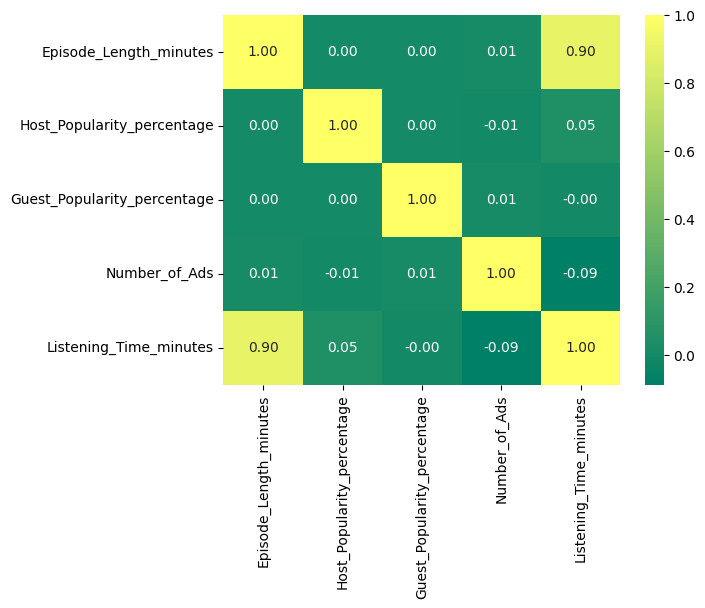

In [10]:
num_cols = df.select_dtypes(include = ['float64', "int64"]).columns.to_list()
sns.heatmap(df[num_cols].corr(), annot = True, fmt = ".2f", cmap = "summer")

<div style="background-color:#F0F8FF; padding: 20px; border-radius: 10px;">
  <h3 style="text-align:center; color:black; font-size:24px;">Observations</h3>
  <ul>
    <li>There are<strong>Null values</strong> in <strong>Episode_Length_minutes</strong>, <strong>Guest_Popularity_percentage</strong>, <strong>Listening_Time_minutes</strong>
    <li><strong>Host_Popularity_percentage</strong>, <strong>Guest_Popularity_percentage</strong> values exceed 100, which shouldn't be the case as it's a percentage.</li>
    <li><strong>Episode_Length_minutes</strong> has a minimum value of 0 — need to investigate.</li>
    <li><strong>Episode_Length_minutes</strong> is highly <strong>correlated</strong> with the target column, so it’s an important feature and needs to be handled carefully.</li>
  </ul>
</div>

# 3. Exploratory Data Analysis

## Univariate Analysis

In [11]:
num_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
cat_cols = [i for i in df.columns[1:-1] if i not in num_cols ]
target_col = ['Listening_Time_minutes']

#### Numerical Columns

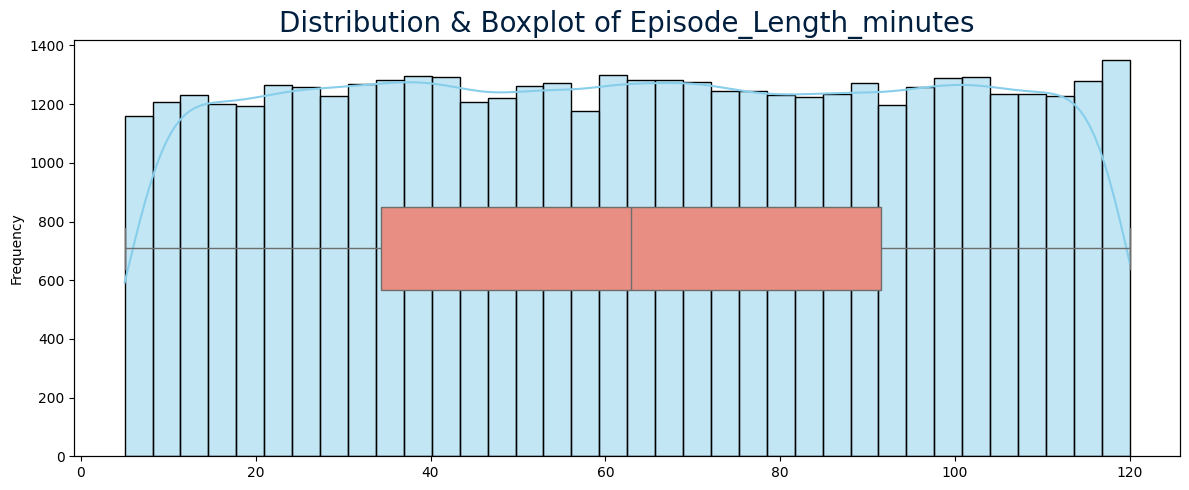

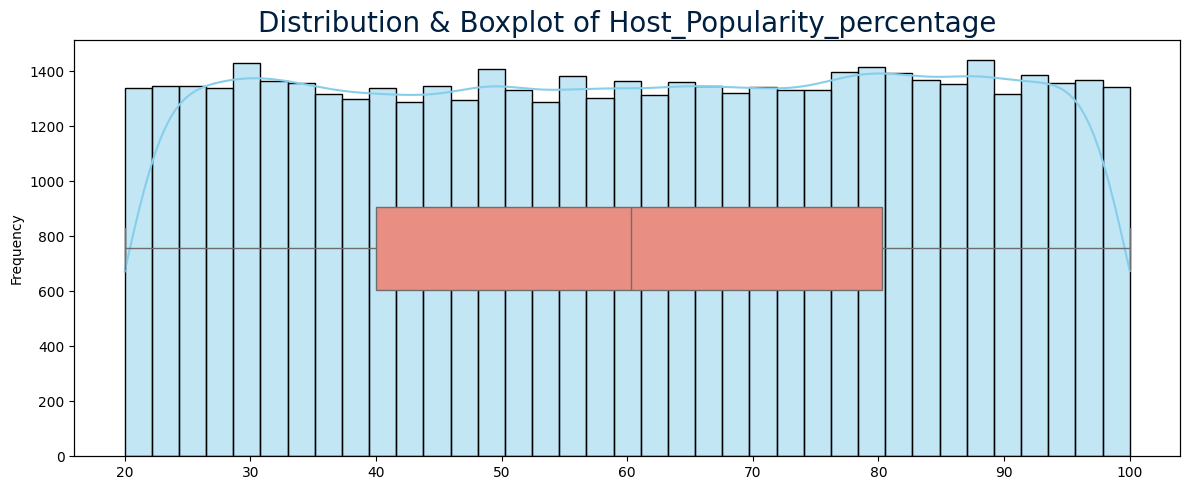

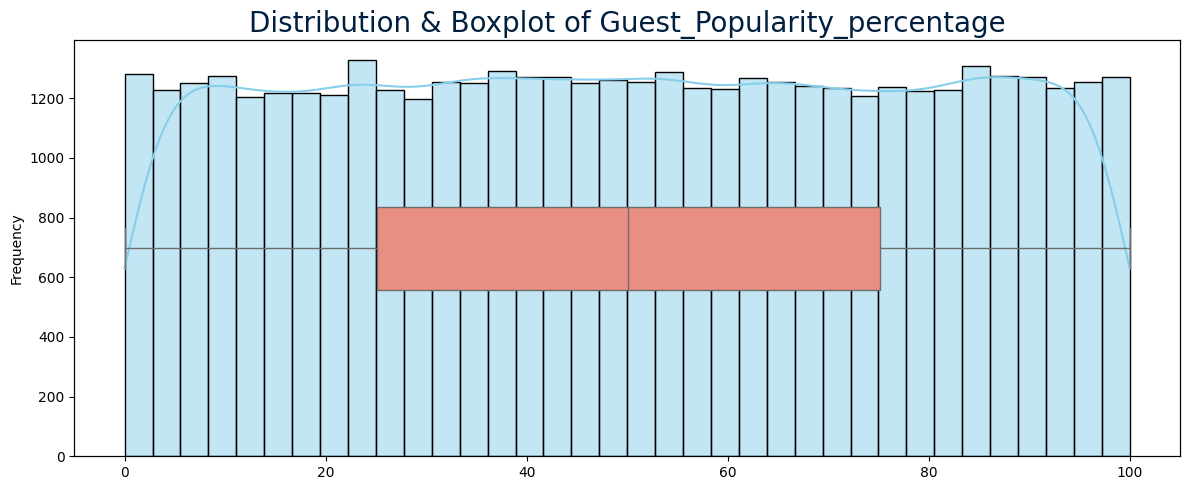

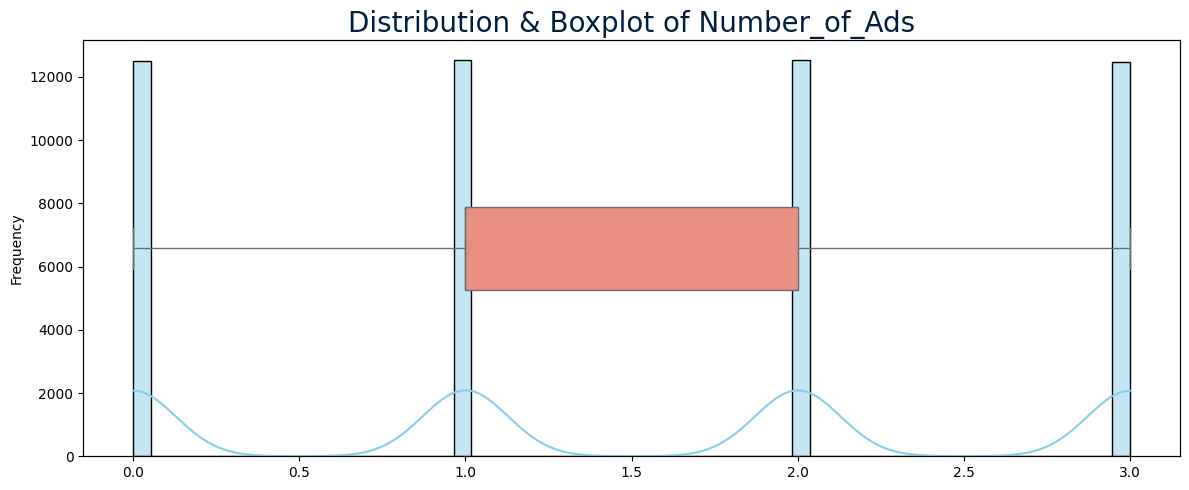

In [12]:
for col in num_cols:
    fig, ax1 = plt.subplots(figsize=(12, 5))

    sns.histplot(df[col], kde=True, ax=ax1, color='skyblue')
    ax1.set_xlabel("")
    ax1.set_ylabel("Frequency")
    
    ax2 = ax1.twinx()
    sns.boxplot(x=df[col], ax=ax2, color='salmon', width=0.2)
    ax2.set_ylabel("")

    ax2.set_yticks([])
    plt.title(f'Distribution & Boxplot of {col}',fontsize = 20, color='#001F3F')
    plt.tight_layout()
    plt.show()

<div style="background-color:#F0F8FF; padding: 20px; border-radius: 10px;">
  <h3 style="text-align:center; color:#1E90FF; font-size:24px;">Observations</h3>
  <ul>
    <li>There are no <strong>Outluiers</strong></li>
    <li><strong>Host_Popularity_percentage</strong>, <strong>Guest_Popularity_percentage</strong> both are close to a uniform distribution and values are in the range of 0–120.</li>
    <li>In <strong>Number_of_Ads</strong>, the values range from 0–3</li>
  </ul>
</div>

#### Categorical Columns

In [13]:
df[cat_cols].nunique()

Episode_Title        100
Genre                 10
Publication_Day        7
Publication_Time       4
Episode_Sentiment      3
dtype: int64

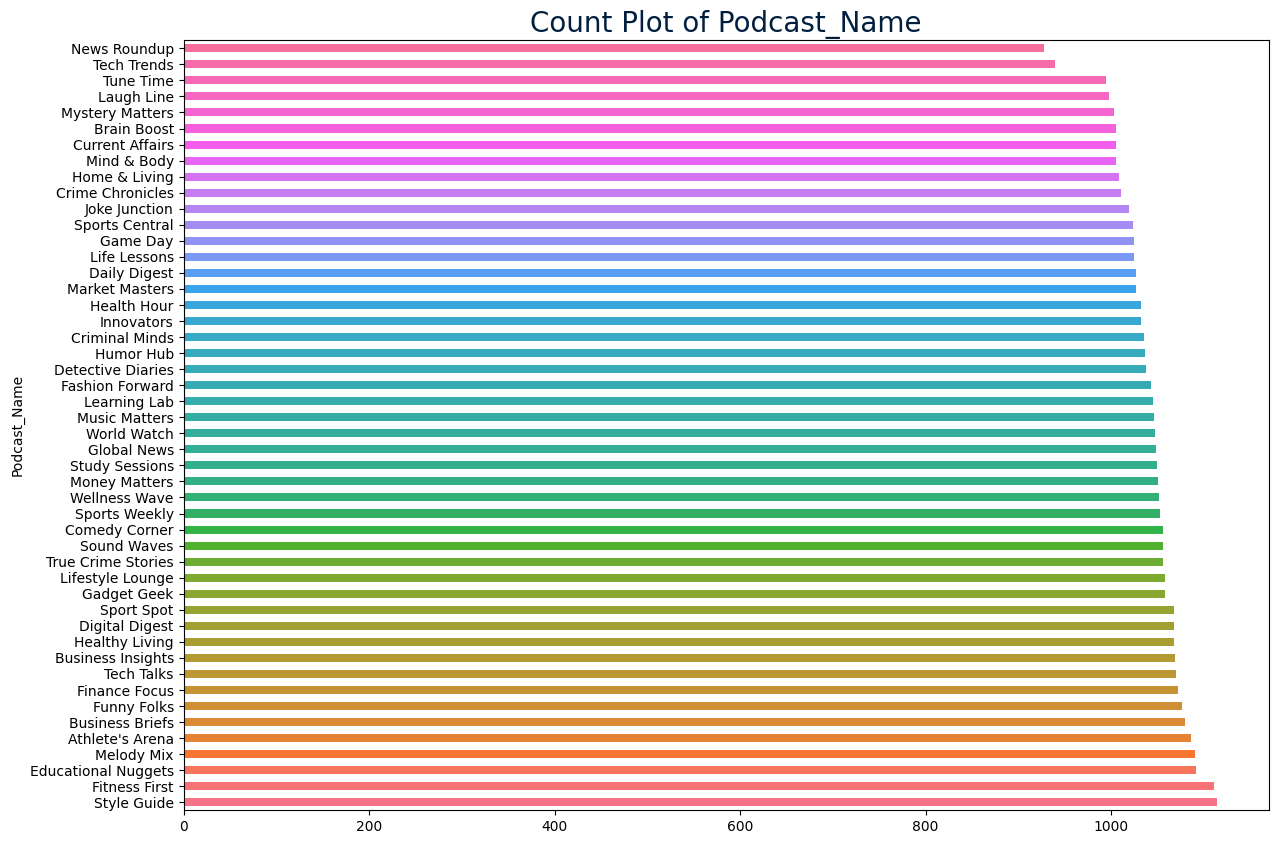

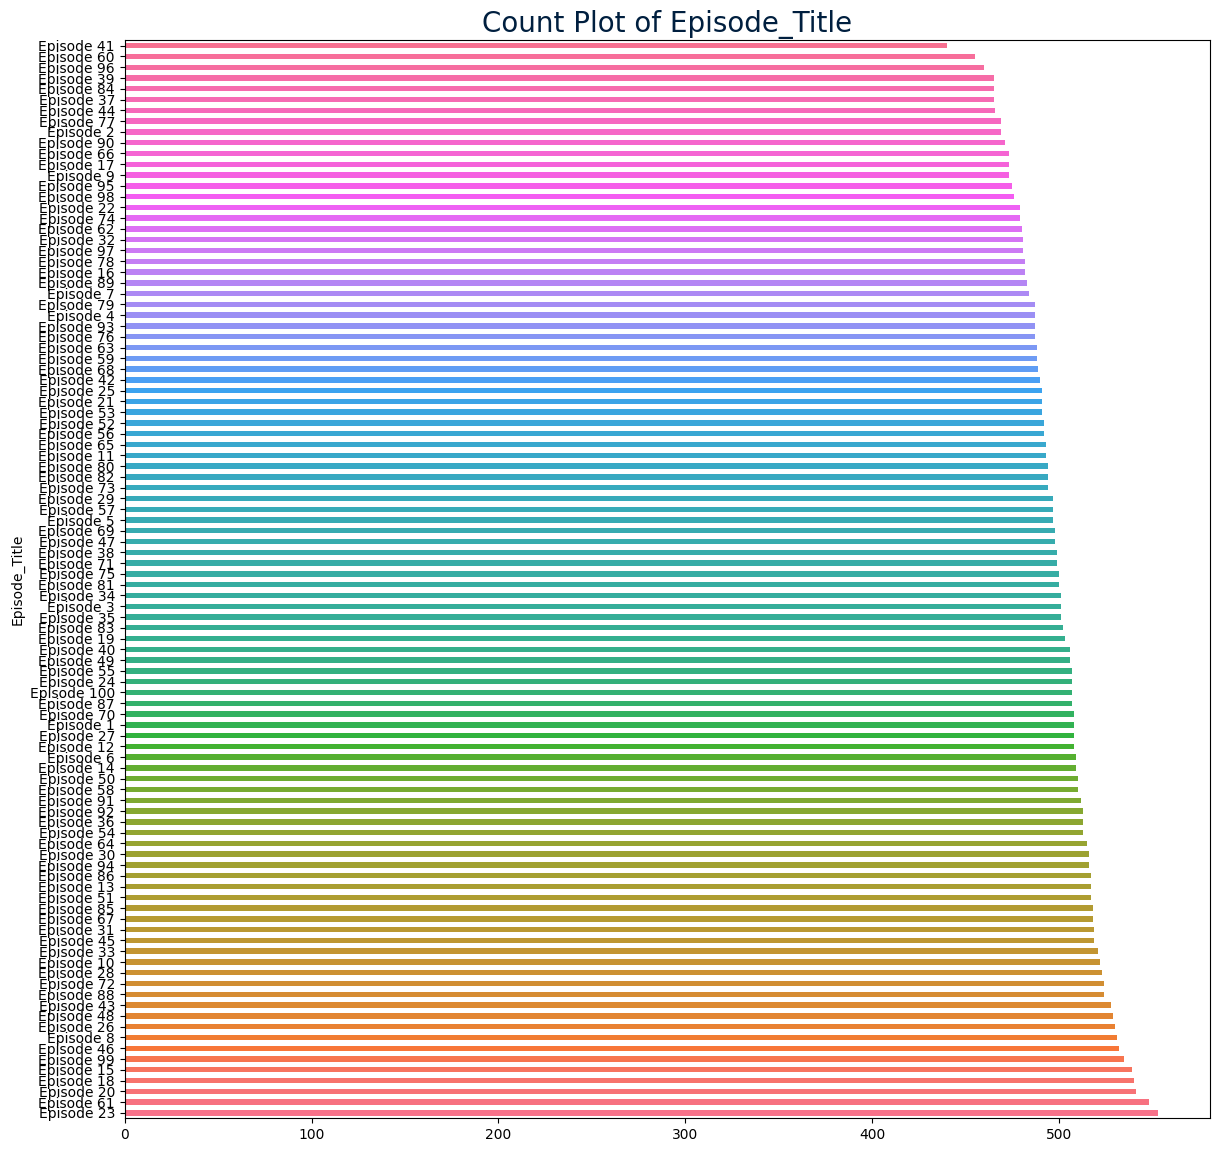

In [14]:
# Podcast_Name Count Plot
plt.figure(figsize = (14, 10))
df["Podcast_Name"].value_counts().plot(
    kind = "barh",
    color=sns.color_palette("husl", n_colors=df["Podcast_Name"].nunique())
)
plt.title("Count Plot of Podcast_Name",fontsize = 20, color = "#001F3F")
plt.show()

# Episode_Title Count Plot
plt.figure(figsize = (14, 14))
df["Episode_Title"].value_counts().plot(
    kind = "barh",
    color=sns.color_palette("husl", n_colors=df["Episode_Title"].nunique())
)
plt.title("Count Plot of Episode_Title",fontsize = 20, color = "#001F3F")
plt.show()

<div style="background-color:#F0F8FF; padding: 20px; border-radius: 10px;">
  <h3 style="text-align:center; color:#1E90FF; font-size:24px;">Observations</h3>
  <ul>
    <li>The categories in <strong>Podcast_Name</strong> and <strong>Episode_Title</strong> are almost uniform</li>
  </ul>
</div>

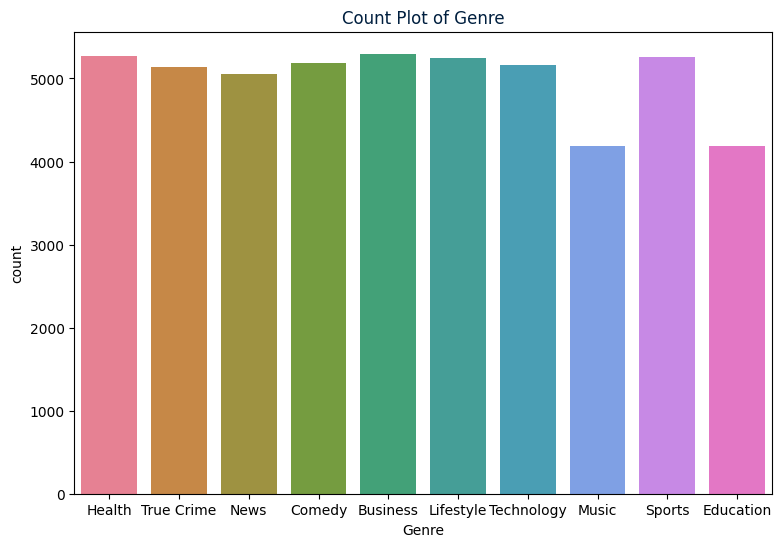

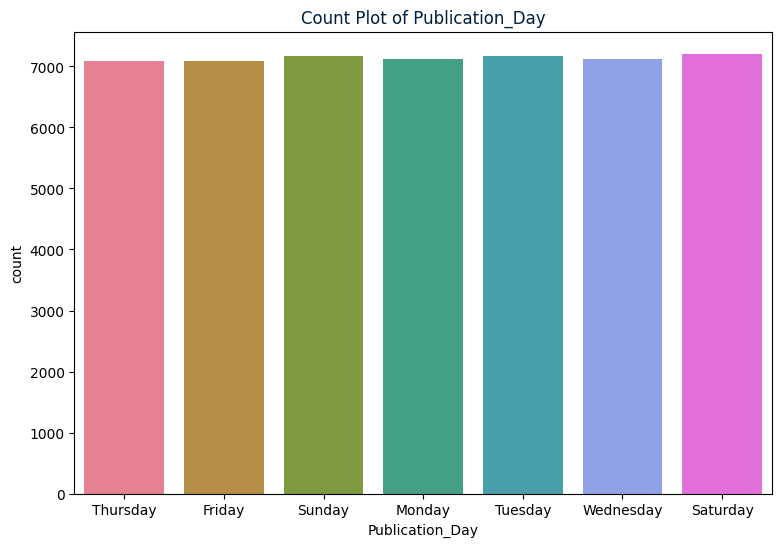

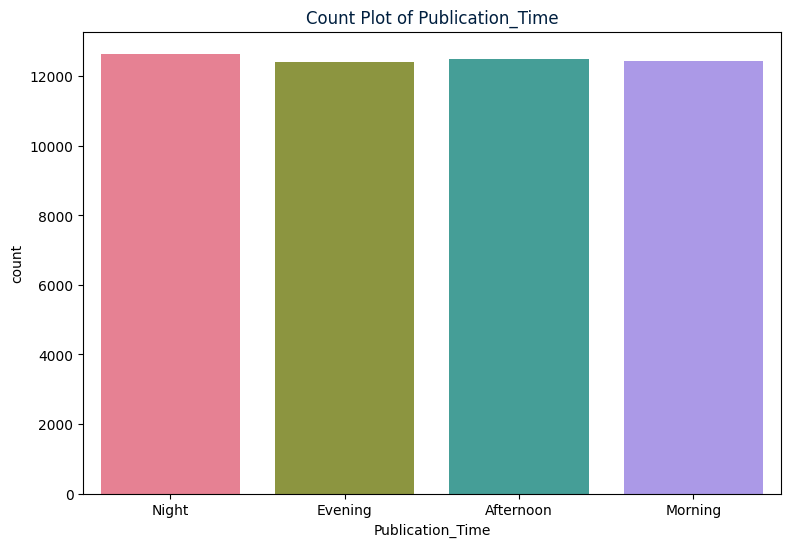

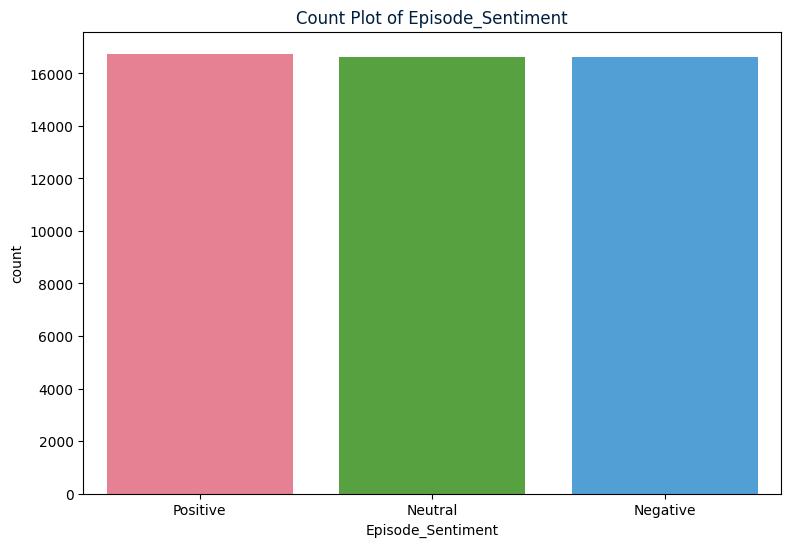

In [15]:
cols = ["Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment"]
for col in cols:
    plt.figure(figsize=(9,6))
    sns.countplot(data=df, x=col, palette = "husl")
    plt.title(f'Count Plot of {col}', color = "#001F3F")
    plt.show()

<div style="background-color:#F0F8FF; padding: 20px; border-radius: 10px;">
  <h3 style="text-align:center; color:#1E90FF; font-size:24px;">Observations</h3>
  <ul>
    <li><strong>Genre</strong>: The count of podcasts is less in Education-related podcasts and the most Sports.</li>
    <li><strong>Publication_Day</strong>: Most podcasts are published on Sunday, and the least on Tuesday. the gap is not so large almost equal number of podcasts are released.</li>
    <li><strong>Publication_Time</strong>: Equal number of podcasts are in all timings.</li>
    <li><strong>Episode_Sentiment</strong>: There are an equal number of Positive, Negative, and Neutral sentiments.</li>
  </ul>
</div>

#### Target Column

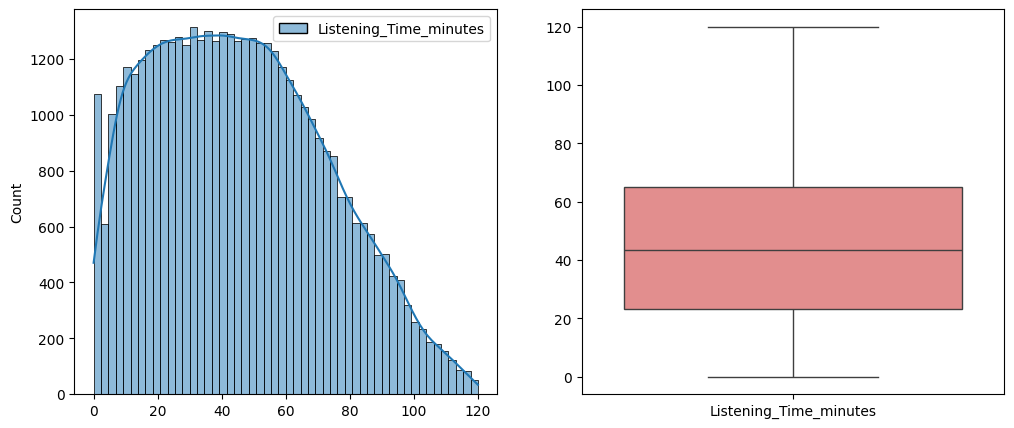

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.histplot(df[target_col], ax = axes[0],kde = True, alpha = 0.5)
sns.boxplot(df[target_col], ax = axes[1], color = "lightcoral")
plt.show()

<div style="background-color:#F0F8FF; padding: 20px; border-radius: 10px;">
  <h3 style="text-align:center; color:#1E90FF; font-size:24px;">Observations</h3>
  <p><strong>Listening_Time_minutes</strong></p>
  <ul>
    <li>The count decreases as the listening time increases — the data is right-skewed.</li>
    <li>The range is from 0 to 120 minutes.</li>
    <li>The count of 0 is high, indicating many audience members are listening to the podcast for less than a minute.</li>
  </ul>
</div>

## Bivariate Analysis

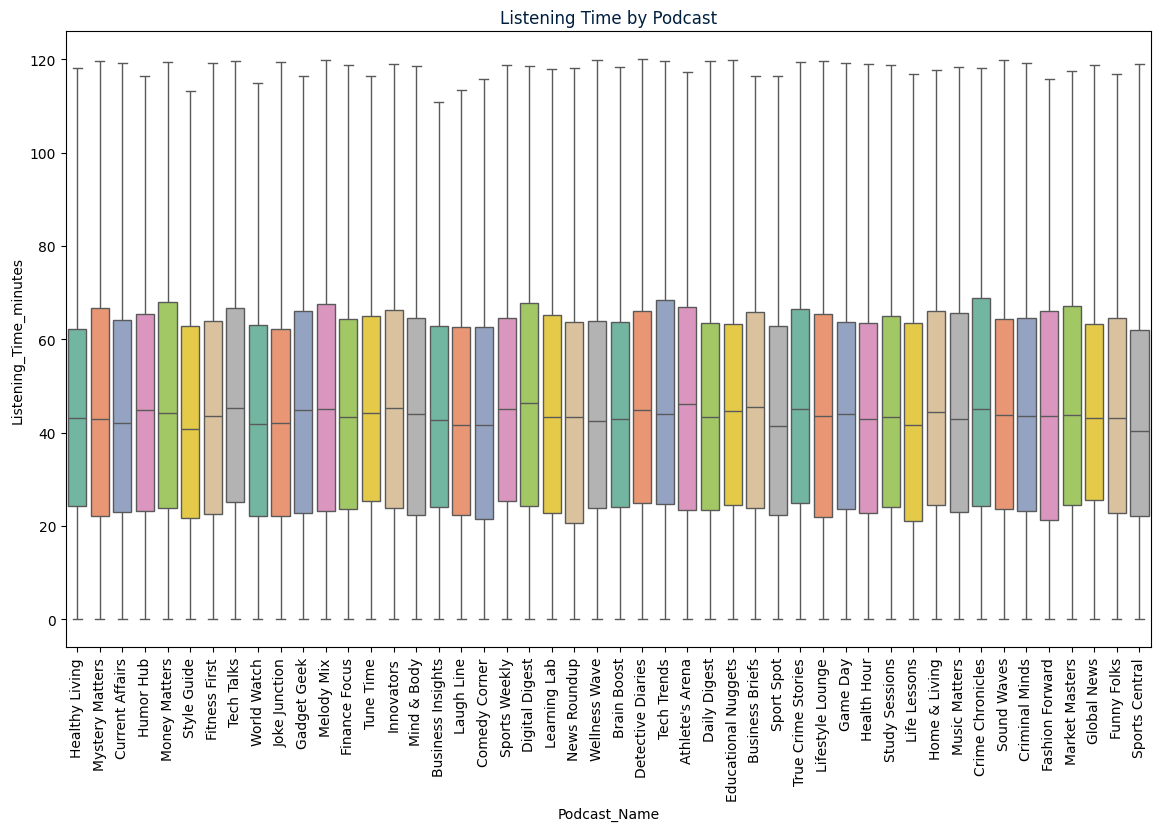

In [17]:
# Podcast Name vs Listening_time_minutes
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df,
    x="Podcast_Name",
    y="Listening_Time_minutes",
    palette="Set2"
)
plt.xticks(rotation=90)
plt.title("Listening Time by Podcast", color="#001F3F")
plt.show()

<p style = "font-size:16px;">The boxplots look nearly the same and show only slight variations in the median.</p>

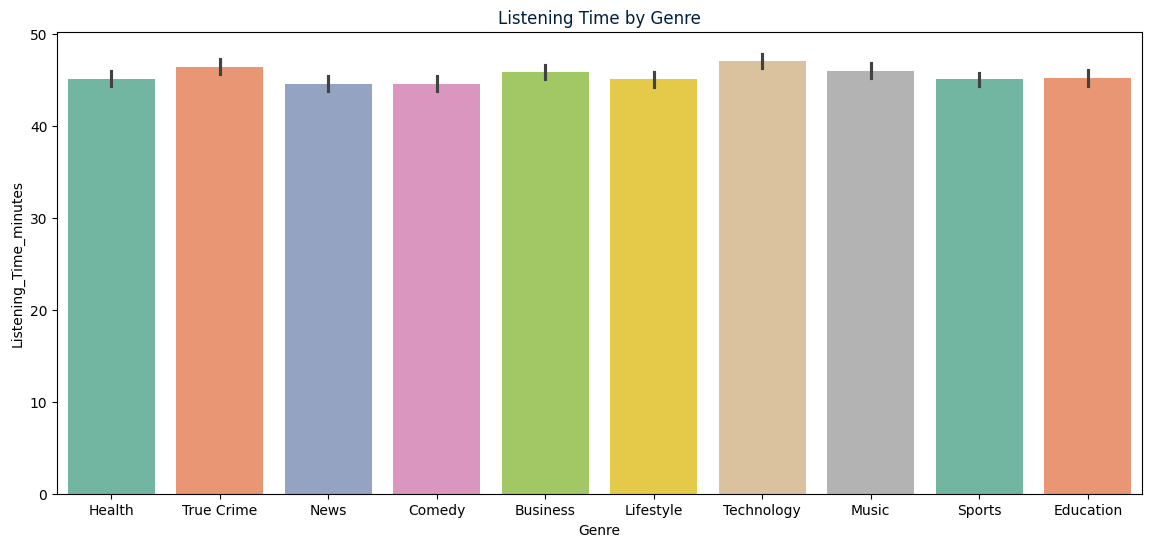

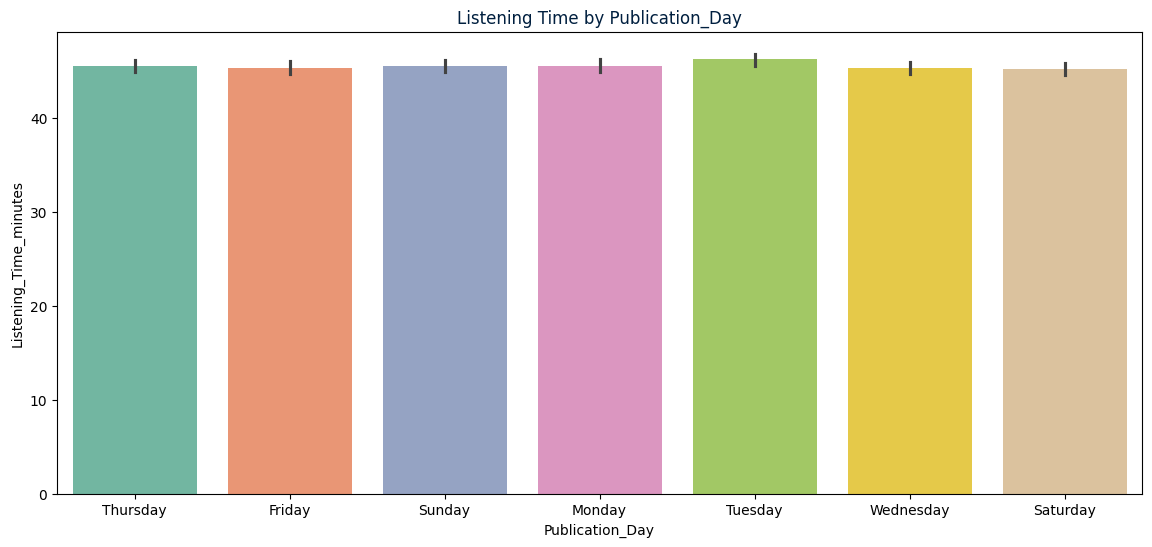

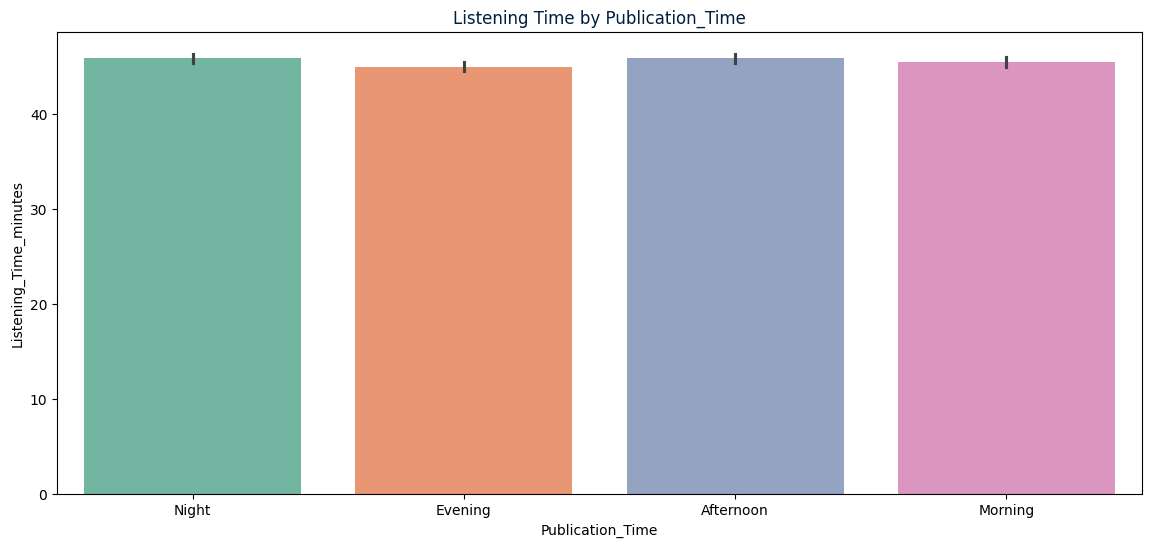

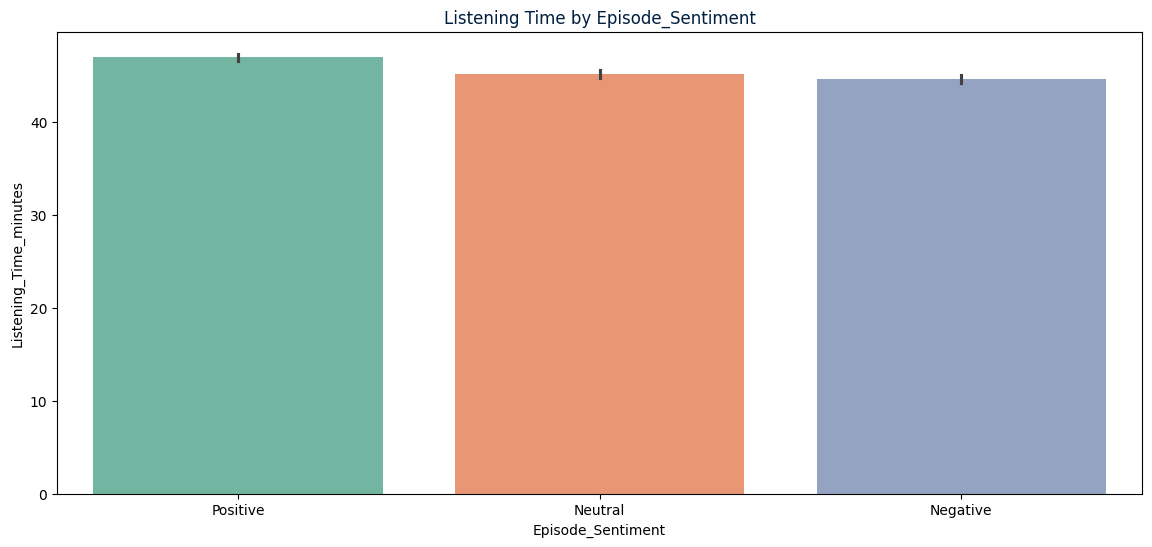

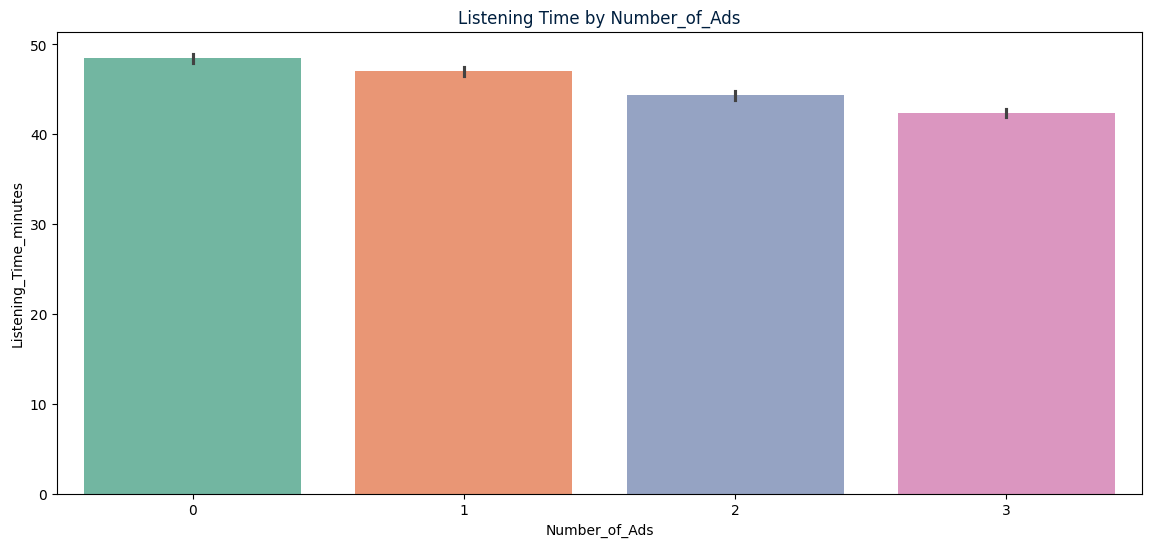

In [18]:
cols = ["Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment", "Number_of_Ads"]
for col in cols:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df,
        x=col,
        y="Listening_Time_minutes",
        palette="Set2"
    )
    plt.title(f"Listening Time by {col}", color="#001F3F")
    plt.show()

<div style="background-color:#F0F8FF; padding: 20px; border-radius: 10px;">
  <h3 style="text-align:center; color:#1E90FF; font-size:24px;">Observations</h3>
  <ul>
    <li><strong>Genre</strong>: True Crime and Music have high listening minutes, while News has low listening time.</li>
    <li><strong>Publication_Day</strong>: Podcasts published on Monday have more listening time.</li>
    <li><strong>Publication_Time</strong>: Podcasts published at Night have more listening time.</li>
    <li><strong>Episode_Sentiment</strong>: Podcasts with Negative sentiment have less listening time.</li>
    <li><strong>Number_of_Ads</strong>: It is negatively proportional to Listening_Time_minutes. Number of ads above 3 are outliers.</li>
  </ul>
</div>

#### Numerical Columns vs Listening Time minutes

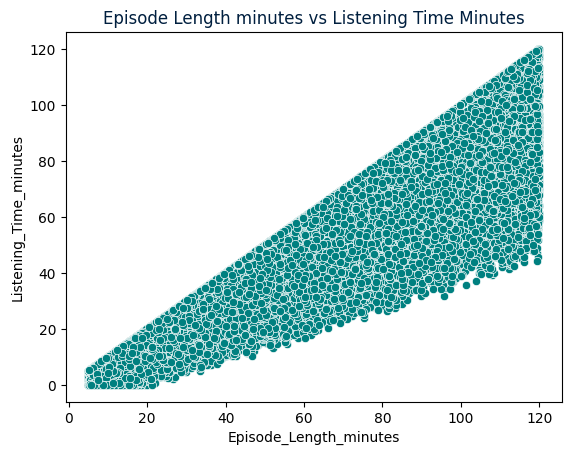

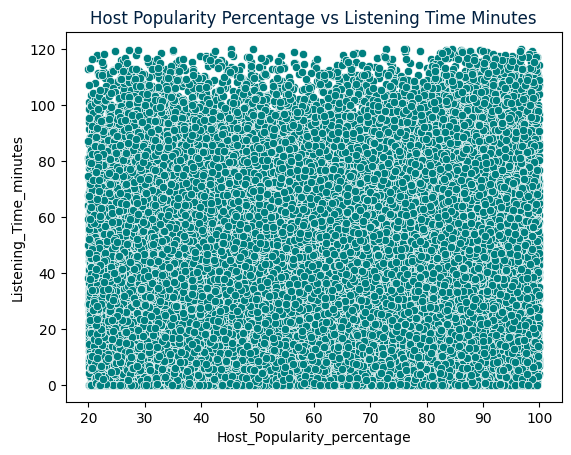

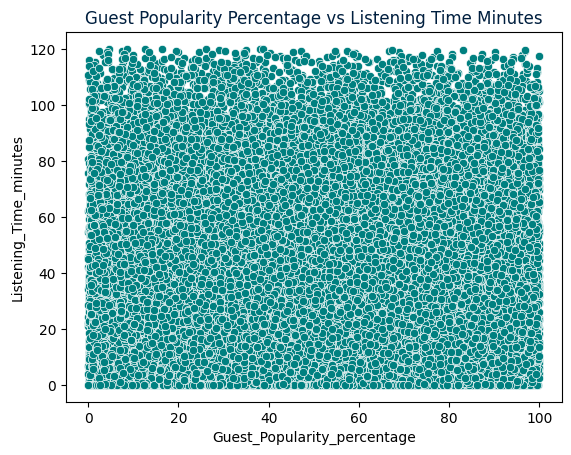

In [19]:
sns.scatterplot(
    data = df,
    x = "Episode_Length_minutes",
    y = "Listening_Time_minutes",
    color = "teal"
)
plt.title("Episode Length minutes vs Listening Time Minutes", color = "#001F3F")
plt.show()


sns.scatterplot(
    data = df,
    x = "Host_Popularity_percentage",
    y = "Listening_Time_minutes",
    color = "teal"
)
plt.title("Host Popularity Percentage vs Listening Time Minutes", color = "#001F3F")
plt.show()

sns.scatterplot(
    data = df,
    x = "Guest_Popularity_percentage",
    y = "Listening_Time_minutes",
    color = "teal"
)
plt.title("Guest Popularity Percentage vs Listening Time Minutes", color = "#001F3F")
plt.show()

<div style="background-color:#F0F8FF; padding: 20px; border-radius: 10px;">
  <h3 style="text-align:center; color:#1E90FF; font-size:24px;">Observations</h3>
  <ul>
    <li><strong>Episode_Length_minutes</strong>: Episode length is directly proportional to <strong>Listening_Time_minutes</strong>.</li>
    <li><strong>Host_Popularity_percentage</strong>: Seems like there is no relation.</li>
    <li><strong>Guest_Popularity_percentage</strong>: Seems like there is no relation.</li>
  </ul>
</div>

# 4. Data Preprocessing

## Handle Null Values
* Episode_Length_minutes
* Guest_Popularity_percentage
* Listening_Time_minutes


In [20]:
df.dropna(subset=["Listening_Time_minutes"], inplace=True)

df["Episode_Length_minutes"] = df["Episode_Length_minutes"].fillna(df["Episode_Length_minutes"].median())

df["Guest_Popularity_percentage"] = df["Guest_Popularity_percentage"].fillna(df["Guest_Popularity_percentage"].median())


df.isnull().sum().sum()

0

# 5. Feature Engineering

In [21]:
X = df.drop(columns = ["Listening_Time_minutes"])
y = df["Listening_Time_minutes"]

#### Create Features

In [22]:
def create_features(df):
    
    # Captures overall combined star power of the host and guest
    df["Host_Guest_Combo_Popularity"] = df["Host_Popularity_percentage"] * df["Guest_Popularity_percentage"]

    # Normalizes ad count by episode length — a measure of ad density
    df["Ads_per_Minute"] = df["Number_of_Ads"] / (df["Episode_Length_minutes"] + 0.00001)
    
    # Measures dominance of host popularity vs guest
    df["Host_to_Guest_Popularity_Ratio"] = df["Host_Popularity_percentage"]/ (df["Guest_Popularity_percentage"] + 0.00001)
    
    # Difference in star power — useful if the gap impacts performance
    df["Popularity_Difference"] = df["Host_Popularity_percentage"] - df["Guest_Popularity_percentage"]
    
    # Captures weighted presence of host/guest by episode duration
    df["Length_x_Host_Popularity"] = df["Episode_Length_minutes"] * df["Host_Popularity_percentage"]
    df["Length_x_Guest_Popularity"] = df["Episode_Length_minutes"] * df["Guest_Popularity_percentage"]
    
    # A rough proxy for how much value the show tries to extract (ads) based on star power
    df["Ad_Density_Popularity"] = df["Number_of_Ads"] * (df["Host_Popularity_percentage"] + df["Guest_Popularity_percentage"])
   
    # Weekend drops might behave differently in engagement
    df["Weekend_Publication"] = df["Publication_Day"].isin(["Saturday", "Sunday"]).astype(int)

    return df

X = create_features(X.copy())
X.shape

(44868, 18)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Encoding Categorical Features

In [24]:
cols = ["Podcast_Name", "Episode_Title", "Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment"]

encoder = TargetEncoder()
X_train[cols] = encoder.fit_transform(X_train[cols], y_train)
X_test[cols] = encoder.transform(X_test[cols])

In [25]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model_Training

In [26]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [27]:
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    eval_metric="RMSE",
    use_best_model=True,
    verbose=10
)

cat_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50
)

0:	learn: 25.1878972	test: 25.4500298	best: 25.4500298 (0)	total: 160ms	remaining: 2m 39s
10:	learn: 15.9613190	test: 15.8428121	best: 15.8428121 (10)	total: 334ms	remaining: 30s
20:	learn: 14.1034199	test: 13.8292559	best: 13.8292559 (20)	total: 583ms	remaining: 27.2s
30:	learn: 13.7580797	test: 13.4414427	best: 13.4414427 (30)	total: 780ms	remaining: 24.4s
40:	learn: 13.6602485	test: 13.3458160	best: 13.3458160 (40)	total: 1.02s	remaining: 23.9s
50:	learn: 13.6155692	test: 13.3231214	best: 13.3231214 (50)	total: 1.18s	remaining: 22s
60:	learn: 13.5836974	test: 13.3128762	best: 13.3128762 (60)	total: 1.37s	remaining: 21.1s
70:	learn: 13.5551861	test: 13.3099115	best: 13.3097940 (64)	total: 1.54s	remaining: 20.1s
80:	learn: 13.5247723	test: 13.3059818	best: 13.3059818 (80)	total: 1.74s	remaining: 19.7s
90:	learn: 13.4987636	test: 13.3070927	best: 13.3057792 (84)	total: 1.91s	remaining: 19s
100:	learn: 13.4743234	test: 13.3107088	best: 13.3057792 (84)	total: 2.08s	remaining: 18.5s
110:	